In [32]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
class DirectedGraph:
    
    def __init__(self,number_of_nodes):
        self.__number_of_nodes = number_of_nodes
        self.adjacency_matrix = np.zeros( (number_of_nodes, number_of_nodes) )

    def add_edge(self, origin_node, destination_node):
        self.adjacency_matrix[
            origin_node,
            destination_node
        ] = 1

    def out_degree(self, origin_node):
        return(
            len(self.edges_from(origin_node=origin_node))
        )


    
    def edges_from(self, origin_node):
        ''' This method should return a list of all the nodes u such that the edge (origin_node,u) is
        part of the graph.'''
        return(
            list(np.where(self.adjacency_matrix[origin_node, :] == 1)[0])
        )
    
    def check_edge(self, origin_node, destination_node):
        ''' This method should return true is there is an edge between origin_node and destination_node
        and destination_node, and false otherwise'''
        return(
            self.adjacency_matrix[origin_node, destination_node] == 1
        )

    def number_of_nodes(self):
        ''' This method should return the number of nodes in the graph'''
        return(
            self.__number_of_nodes
        )

    def get_nodes(self):
        return(
            list(range(self.number_of_nodes()))
        )

    def edges_to(self, destination_node):
        return (
            list(np.where(self.adjacency_matrix[:, destination_node] == 1)[0])
        )


In [8]:
def scaled_page_rank(graph, num_iter, eps = 1/7.0):
    ''' This method, given a directed graph, should run the epsilon-scaled page-rank
    algorithm for num-iter iterations and return a mapping (dictionary) between a node and its weight. 
    In the case of 0 iterations, all nodes should have weight 1/number_of_nodes'''

    # Init page rank values
    page_ranks = dict(zip(
        graph.get_nodes(),
        np.full((1, graph.number_of_nodes()), 1 / graph.number_of_nodes())[0]
    ))
    if num_iter == 0:
        return(page_ranks)


    # Calculate progress breakpoints
    breakpoints = [int(i) for i in np.round(np.linspace(1, num_iter, num=10), 0)]

    # Begin iterating
    for iter in range(num_iter):
        # debugging help...
        if iter in breakpoints:
            print("{}% completed...".format(
                breakpoints.index(iter) * 10
            ))

        # Init current iteration page ranks
        tmp_page_ranks = dict()

        for node in page_ranks.keys():
            # Init and calculate dangling nodes value
            dangling_value = 0
            if len(graph.edges_from(origin_node=node))==0:
                dangling_value = page_ranks[node]

            # Run current page rank calculation
            tmp_page_ranks[node] = (eps/graph.number_of_nodes()) + \
                               (1-eps) * \
                               (
                                   np.sum(
                                       [
                                           page_ranks[other_node] / graph.out_degree(other_node)
                                           for other_node in graph.edges_to(node)
                                       ]
                                   ) + dangling_value
                               )

            # alternative implementation (found on Priceton's site)
            # tmp_page_ranks[node] = (1 - eps) + \
            #                        (eps) * \
            #                        (
            #                            np.sum(
            #                                [
            #                                    page_ranks[other_node] / graph.out_degree(other_node)
            #                                    for other_node in graph.edges_to(node)
            #                                ]
            #                            ) +
            #                            dangling_value
            #                        )
        page_ranks = tmp_page_ranks

    # Check output
    if round(sum(page_ranks.values()), 2) != 1.0:
        raise ValueError("Sum of page rank is not close enough to 1.")

    return(page_ranks)


In [9]:
def graph_15_1_left():
    ''' This method, should construct and return a DirectedGraph encoding the left example in fig 15.1
    Use the following indexes: A:0, B:1, C:2, Z:3 '''
    g = DirectedGraph(4)
    g.add_edge(0, 1)
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(0, 3)
    return(g)


In [10]:
def graph_15_1_right():
    ''' This method, should construct and return a DirectedGraph encoding the right example in fig 15.1
    Use the following indexes: A:0, B:1, C:2, Z1:3, Z2:4'''
    g = DirectedGraph(5)
    g.add_edge(0, 1)
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(0, 3)
    g.add_edge(0, 4)
    g.add_edge(3, 4)
    g.add_edge(4, 3)
    return (g)


In [11]:
def graph_15_2():
    ''' This method, should construct and return a DirectedGraph encoding example 15.2
        Use the following indexes: A:0, B:1, C:2, A':3, B':4, C':5'''
    g = DirectedGraph(6)
    g.add_edge(0, 1)
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(3, 4)
    g.add_edge(4, 5)
    g.add_edge(5, 3)
    return (g)


In [12]:
def extra_graph_1():
    ''' This method, should construct and return a DirectedGraph of your choice with at least 10 nodes'''    
    g = DirectedGraph(12)
    g.add_edge(0, 1)
    g.add_edge(1, 0)
    g.add_edge(0, 2)
    g.add_edge(2, 0)
    g.add_edge(0, 3)
    g.add_edge(3, 0)

    g.add_edge(3, 4)
    g.add_edge(3, 5)
    g.add_edge(3, 6)
    g.add_edge(3, 7)

    g.add_edge(3, 8)
    g.add_edge(3, 9)
    g.add_edge(3, 10)
    g.add_edge(3, 11)

    g.add_edge(8, 0)
    g.add_edge(9, 0)
    g.add_edge(10, 0)
    g.add_edge(11, 0)

    return(g)


In [13]:
extra_graph_1_weights = scaled_page_rank(graph=extra_graph_1(), num_iter = 50)


0% completed...
10% completed...
20% completed...
30% completed...
40% completed...
50% completed...
60% completed...
70% completed...
80% completed...


In [14]:
def extra_graph_2():
    ''' This method, should construct and return a DirectedGraph of your choice with at least 10 nodes'''    
    g = DirectedGraph(11)

    g.add_edge(0, 2)
    g.add_edge(2, 0)
    g.add_edge(1, 2)
    g.add_edge(2, 3)
    g.add_edge(3, 4)
    g.add_edge(4, 6)
    g.add_edge(6, 4)
    g.add_edge(6, 3)
    g.add_edge(5, 6)

    g.add_edge(3, 7)
    g.add_edge(3, 8)
    g.add_edge(3, 9)

    g.add_edge(7, 10)
    g.add_edge(8, 10)
    g.add_edge(9, 10)

    return(g)


In [15]:
extra_graph_2_weights = scaled_page_rank(graph=extra_graph_2(), num_iter = 50)


0% completed...
10% completed...
20% completed...
30% completed...
40% completed...
50% completed...
60% completed...
70% completed...
80% completed...


In [16]:
def facebook_graph(filename = "facebook_combined.txt"):
    ''' This method should return a DIRECTED version of the facebook graph as an instance of the DirectedGraph class.
    In particular, if u and v are friends, there should be an edge between u and v and an edge between v and u.'''
    with open(filename, mode="r") as f:
        content = f.readlines()
    content = [x.strip().split(' ') for x in content]

    g = DirectedGraph(4039)
    for edge in content:
        g.add_edge(origin_node=int(edge[0]), destination_node=int(edge[1]))
        g.add_edge(origin_node=int(edge[1]), destination_node=int(edge[0]))

    return(g)


In [17]:
def question8b():

    # Load Facebook graph
    filepath = "~/data/facebook_combined.txt"
    FB_g = facebook_graph(filename=filepath)

    # Run PR for 20 iterations
    pr = scaled_page_rank(graph=FB_g, num_iter=20)

    return(pr)


In [18]:
testGraph = DirectedGraph(5)

In [19]:
assert testGraph.number_of_nodes() == 5

In [20]:
assert testGraph.check_edge(0,1) == False

In [21]:
testGraph.add_edge(0,1)


In [22]:
assert testGraph.check_edge(0,1) == True

In [23]:
weights = scaled_page_rank(testGraph,0)

In [24]:
assert weights[2] == 1/5.0


In [26]:
assert graph_15_1_left().number_of_nodes() == 4

In [27]:
test_graphs = {
    "graph_15_1_left":graph_15_1_left(),
    "graph_15_1_right":graph_15_1_right(),
    "graph_15_2":graph_15_2(),
    "extra_graph_1":extra_graph_1(),
    "extra_graph_2":extra_graph_2()
}

In [28]:
graph_name = list(test_graphs.keys())[0]

In [29]:
g = test_graphs[graph_name]

In [30]:
pr = scaled_page_rank(graph=g, num_iter = 100, eps=3/7.0)

0% completed...
10% completed...
20% completed...
30% completed...
40% completed...
50% completed...
60% completed...
70% completed...
80% completed...


In [33]:
nx.draw(
     nx.DiGraph(g.adjacency_matrix),
     labels = dict(zip(pr.keys(),["{} : PR={}".format(node, round(pr[node], 2)) for node in pr])),
     arrows=True,
     node_size=[i*100000 for i in list(pr.values())],
     node_color='b',
     alpha=0.3
 )

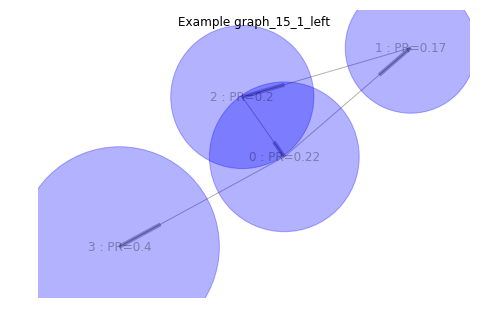

In [35]:
plt.suptitle("Example " + graph_name)
plt.show()


In [36]:
dadpr = question8b()
pr_sorted = sorted(pr.items(), key=lambda x:x[1])
high_20_fb_pr_idx = [item[0] for item in pr_sorted[-20:]]
low_20_fb_pr_idx = [item[0] for item in pr_sorted[0:20]]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/davidhachuel/Google Drive/Cornell Tech/FALL_2017/CS_5854_NETWORKS_&_MARKETS/HW4/data/facebook_combined.txt'

In [ ]:
pr = question8b()
# Basic Box Plot
plt.boxplot(list(pr.values()))
plt.suptitle("Page Rank Distribution in Facebook Graph")
plt.show()

In [ ]:
pr = question8b()
FB_g = nx.DiGraph(

facebook_graph(filename="~/data/facebook_combined.txt").adjacency_matrix
)

nodes = list(pr.keys())
pagerank = [pr[node] for node in nodes]
avg_neighbor_degree = list(nx.average_neighbor_degree(G=FB_g,
nodes=nodes).values())
degree = list(nx.degree(G=FB_g, nbunch=nodes).values())

In [ ]:
plt.figure(1)
# Plot 1 : avg neighbor degree vs pagerank
plt.subplot(121)
plt.scatter(avg_neighbor_degree, pagerank, c=pagerank)
plt.xlabel("Average Neighbor Degree")
plt.ylabel("Page Rank")
plt.title("")
plt.show()

In [ ]:
# Plot 2 : degree vs pagerank
plt.subplot(122)
plt.scatter(degree, pagerank, c=pagerank)
plt.xlabel("Node Degree")
plt.ylabel("Page Rank")
plt.title("")
plt.show()